In [1]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing

from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score


Read the Dataset

In [2]:
Car=pd.read_csv('Cardetails.csv')

In [3]:
Car.head()

,Unnamed: 0,Brand,Model,Variant,Manufacturing_Year,Driven_kilometres,Fuel,Number_of_owners,Location,Price
0,0,Maruti Suzuki,Celerio,ZXI AMT,2017,"11,439 km",Petrol,1st,"Sainikpuri, Hyderabad, Telangana","₹ 4,90,000"
1,1,Mahindra,Xylo,2009-2011 E8,2011,"81,000 km",Diesel,1st,"Rocktown Colony, Hyderabad, Telangana","₹ 3,96,000"
2,2,Tata,Nexon,1.2 Revotron XM,2018,"55,700 km",Petrol,1st,"Himayat Nagar, Hyderabad, Telangana","₹ 7,75,000"
3,3,Honda,CR-V,2007-2012 AT With Sun Roof,2010,"71,174 km",Petrol,1st,"Madhapur, Hyderabad, Telangana","₹ 7,50,000"
4,4,Maruti Suzuki,Swift Dzire,VDI,2019,"65,035 km",Diesel,1st,"Ameerpet, Hyderabad, Telangana","₹ 7,90,000"


Remove the unwanted columns

In [4]:
Car.drop('Unnamed: 0',inplace=True,axis=1)

In [5]:
Car.head()

,Brand,Model,Variant,Manufacturing_Year,Driven_kilometres,Fuel,Number_of_owners,Location,Price
0,Maruti Suzuki,Celerio,ZXI AMT,2017,"11,439 km",Petrol,1st,"Sainikpuri, Hyderabad, Telangana","₹ 4,90,000"
1,Mahindra,Xylo,2009-2011 E8,2011,"81,000 km",Diesel,1st,"Rocktown Colony, Hyderabad, Telangana","₹ 3,96,000"
2,Tata,Nexon,1.2 Revotron XM,2018,"55,700 km",Petrol,1st,"Himayat Nagar, Hyderabad, Telangana","₹ 7,75,000"
3,Honda,CR-V,2007-2012 AT With Sun Roof,2010,"71,174 km",Petrol,1st,"Madhapur, Hyderabad, Telangana","₹ 7,50,000"
4,Maruti Suzuki,Swift Dzire,VDI,2019,"65,035 km",Diesel,1st,"Ameerpet, Hyderabad, Telangana","₹ 7,90,000"


In [6]:
Car['Price'] = Car['Price'].replace('\₹', '', regex=True)

In [7]:
Car['Price'] = Car['Price'].replace('\,', '', regex=True)

In [8]:
Car['Price'].value_counts()

-          706
 500000    116
 600000     98
 350000     88
 390000     86
          ... 
 676000      2
 655000      2
 872000      2
 451000      2
 789000      2
Name: Price, Length: 301, dtype: int64

In [9]:
Car['Price'] = Car['Price'].replace('-', 0)

In [10]:
Car['Price'] = pd.to_numeric(Car['Price'])

In [11]:
Car['Price'] = Car['Price'].replace('0',(Car['Price'].mean()) )

In [12]:
Car['Price']

0        490000
1        396000
2        775000
3        750000
4        790000
         ...   
6926     749000
6927          0
6928    1150000
6929    4550000
6930    1045000
Name: Price, Length: 6931, dtype: int64

In [13]:
def whitespace_remover(dataframe):
    
    # iterating over the columns
    for i in dataframe.columns:
          
        # checking datatype of each columns
        if dataframe[i].dtype == 'object':
              
            # applying strip function on column
            dataframe[i] = dataframe[i].map(str.strip)
        else:
              
            # if condn. is False then it will do nothing.
            pass
  

In [14]:
whitespace_remover(Car)

TRAIN TEST SPLIT

In [15]:
X_train, X_test, y_train, y_test = train_test_split(Car.iloc[:, :-1], 
                                                    Car.iloc[:, -1], 
                                                    test_size = 0.3, 
                                                    random_state = 42)

EXPLORATORY DATA ANALYSIS

Let's explore the various columns and draw information about how useful each column is. I'll also modify the test data based on training data

Sometimes the resale value of a car also depends on manufacturer of car hence lets see the distribution of the cars by Manufacturer and see the count for each brand 

In [16]:
Car['Brand']=Car['Brand'].replace('-','Maruti Suzuki')

In [17]:
Car['Brand'].value_counts()

Maruti Suzuki    2570
Hyundai          1090
Mahindra          530
Honda             478
Toyota            428
Ford              329
Renault           232
Mercedes-Benz     179
Volkswagen        175
Tata              162
BMW               129
Audi               93
Chevrolet          86
Skoda              74
Land Rover         72
Datsun             65
Kia                45
Jaguar             36
Volvo              31
Nissan             28
MG                 28
Fiat               20
Force Motors       18
Mini               18
Mitsubishi          6
Jeep                5
Porsche             4
Name: Brand, dtype: int64

Text(0, 0.5, 'Count of cars')

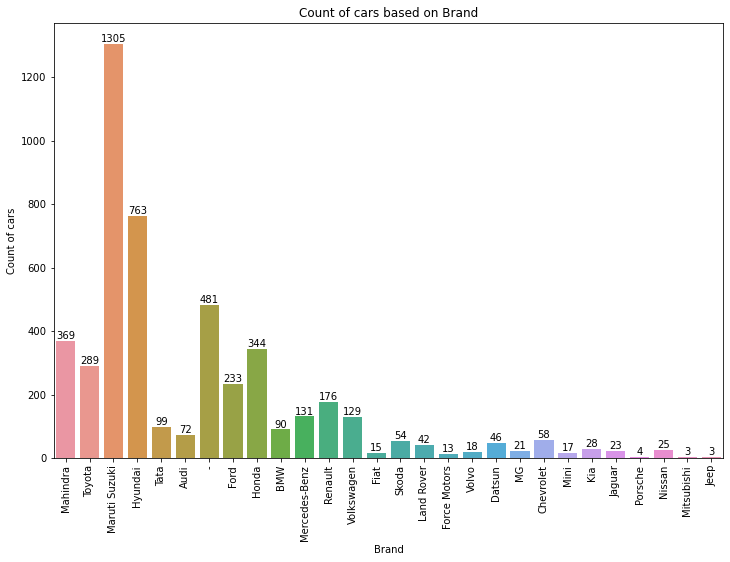

In [18]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Brand', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on Brand")
plt.xlabel("Brand")
plt.ylabel("Count of cars")

Maximum cars in the data extract are by the manufacturer Maruti Suzuki

Location

In [19]:
Car['Location'].value_counts()

-                                                                    706
Pitampura, Delhi, Delhi                                              229
Noida Extension, Noida, Uttar Pradesh                                171
Madhapur, Hyderabad, Telangana                                       146
Hazratganj, Lucknow, Uttar Pradesh                                   137
                                                                    ... 
Infocity, Gandhinagar, Gujarat                                         3
Subhash Park, Vadodara, Gujarat                                        2
Bhagwan Nagar Tekra, Ahmedabad, Gujarat                                2
Billekahalli, Bengaluru, Karnataka                                     2
Banaswadi Rammurthi Nagar Green Park Layout, Bengaluru, Karnataka      2
Name: Location, Length: 260, dtype: int64

In [20]:
Car['Location']=Car['Location'].replace('-','Delhi')

In [21]:
Car.Location.mode()

0    Delhi
dtype: object

Location should not be a determinant for the price of a car and I'll safely remove it.

In [22]:
X_train.drop("Location", axis = 1, inplace = True)

In [23]:

X_test.drop("Location", axis = 1, inplace = True)

Year

In [24]:
curr_time = datetime.datetime.now()


In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4851 entries, 3203 to 860
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brand               4851 non-null   object
 1   Model               4851 non-null   object
 2   Variant             4851 non-null   object
 3   Manufacturing_Year  4851 non-null   object
 4   Driven_kilometres   4851 non-null   object
 5   Fuel                4851 non-null   object
 6   Number_of_owners    4851 non-null   object
dtypes: object(7)
memory usage: 463.2+ KB


In [26]:
X_train['Manufacturing_Year']=X_train['Manufacturing_Year'].replace('-','2000')
X_test['Manufacturing_Year'] = X_test['Manufacturing_Year'].replace('-','2000')



In [27]:
X_train['Manufacturing_Year']=X_train['Manufacturing_Year'].replace('Petrol','2000')
X_test['Manufacturing_Year'] = X_test['Manufacturing_Year'].replace('Petrol','2000')

In [28]:
X_train['Manufacturing_Year']=X_train['Manufacturing_Year'].replace('Diesel','2000')
X_test['Manufacturing_Year'] = X_test['Manufacturing_Year'].replace('Diesel','2000')

In [29]:
X_train['Manufacturing_Year']=X_train['Manufacturing_Year'].replace('82,084 km','2000')
X_test['Manufacturing_Year'] = X_test['Manufacturing_Year'].replace('82,084 km','2000')


In [30]:
X_train['Manufacturing_Year']=X_train['Manufacturing_Year'].replace('78,000 km','2000')
X_test['Manufacturing_Year'] = X_test['Manufacturing_Year'].replace('78,000 km','2000')

In [31]:
X_train['Manufacturing_Year']=X_train['Manufacturing_Year'].astype(int)
X_test['Manufacturing_Year'] = X_test['Manufacturing_Year'].astype(int)

In [32]:
X_train['Manufacturing_Year'] = X_train['Manufacturing_Year'].apply(lambda x : curr_time.year - x)
X_test['Manufacturing_Year'] = X_test['Manufacturing_Year'].apply(lambda x : curr_time.year - x)

In [33]:
X_train['Manufacturing_Year']

3203     9
1350     7
6812    10
446      7
1743     9
        ..
3772     3
5191    11
5226    20
5390    10
860      5
Name: Manufacturing_Year, Length: 4851, dtype: int64

Model,Variant,Fuel,Number_of_owners .All these columns are categorical columns which should be converted to dummy variables before being used


Kilometers_Driven

In [34]:
X_train["Driven_kilometres"]

3203     71,000 km
1350    110,000 km
6812     67,000 km
446     175,835 km
1743     61,000 km
           ...    
3772     15,000 km
5191     90,000 km
5226     39,000 km
5390     39,000 km
860      44,000 km
Name: Driven_kilometres, Length: 4851, dtype: object

The data range is really varied and the high values might affect prediction, thus, it is really important that scaling be applied to this column for sure

Data PREPROCESSING

i)Dealing with missing values

In [35]:
Car.isnull().sum()

Brand                 0
Model                 0
Variant               0
Manufacturing_Year    0
Driven_kilometres     0
Fuel                  0
Number_of_owners      0
Location              0
Price                 0
dtype: int64

In [36]:
#There are no missing values in the dataframe

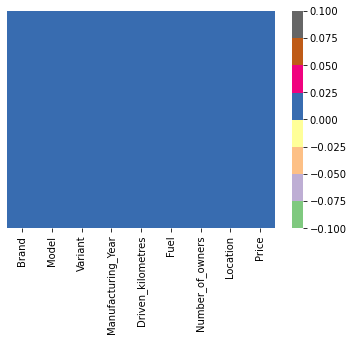

In [37]:
#heatmap to verify nulll values using graph
sns.heatmap(Car.isnull(),yticklabels=False,cbar=True,cmap='Accent')

In [38]:
#define numeric variable and categorical variable to work separatly on them
num_col=['Manufacturing_Year']
cat_cols=['Brand','Model','Variant','Fuel','Number_of_owners','Location','Driven_kilometres']

Now that we have worked with the training data, let's create dummy columns for categorical columns before we begin training.

In [39]:

X_train = pd.get_dummies(X_train,
                         columns = ["Brand", "Model", "Variant","Fuel", "Number_of_owners","Driven_kilometres"],
                         drop_first = True)

In [40]:

X_test = pd.get_dummies(X_test,
                         columns = ["Brand", "Model", "Variant","Fuel", "Number_of_owners","Driven_kilometres"],
                         drop_first = True)

In [41]:
#It might be possible
#that the dummy column creation would be different in test and train data, thus, I'd fill in all missing columns with zeros.

In [42]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]


Finally, as the last step of data processing, I'll scale the data.

In [43]:
standardScaler = StandardScaler()

In [44]:
standardScaler.fit(X_train)

StandardScaler()

In [45]:
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

Training and predicting

Linear Regression model and a Random Forest model to train on the data and use it for future predictions

In [46]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
r2_score(y_test, y_pred)

-3.1166934584082743e+19

In [47]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.9996492831347448

In [48]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
dt=DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
r2_score(y_test, y_pred)

0.9998943770607401

The Decision tree model performed the best with a R2 score of 0.99